In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/mattmastin/Desktop/listings_summary_clean (1).csv')

pd.set_option('display.max_columns', 500)

print(df.shape)
df.head()

(22552, 20)


,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month
0,2015,52.534537,13.402557,3,1.0,1.0,2.0,60.0,200.0,30.0,1,28.0,4,1125,118,93.0,10.0,10.0,9.0,3.76
1,2695,52.548513,13.404553,2,1.0,1.0,1.0,17.0,0.0,0.0,1,0.0,2,40,6,100.0,10.0,10.0,10.0,1.42
2,3176,52.534996,13.417579,4,1.0,1.0,2.0,90.0,200.0,50.0,2,20.0,62,1125,143,92.0,9.0,10.0,9.0,1.25
3,3309,52.498855,13.349065,2,1.0,1.0,1.0,26.0,250.0,30.0,1,18.0,5,360,25,88.0,9.0,9.0,9.0,0.39
4,7071,52.543157,13.415091,2,1.0,1.0,2.0,42.0,0.0,0.0,1,24.0,2,10,197,96.0,10.0,10.0,9.0,1.75


In [4]:
df.isnull().sum()

id                                  0
name                               59
description                       203
neighborhood_overview           11012
transit                          9516
neighbourhood_group_cleansed        0
state                              84
zipcode                           656
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
beds                               40
bed_type                            0
amenities                           0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from xgboost import XGBRegressor
import category_encoders as ce
from joblib import dump, load
from sklearn.pipeline import make_pipeline

In [10]:
train, test = train_test_split(df, test_size=0.20, random_state=1)

In [11]:
train.shape, test.shape

((18041, 20), (4511, 20))

In [12]:
train2, val = train_test_split(train, test_size=0.2, random_state=1)

In [21]:
target = 'price'

X_train = train2.drop(columns=['price'])
X_val = val.drop(columns=['price'])
y_train = train2[target]
y_val = val[target]

In [22]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14432, 19), (3609, 19), (14432,), (3609,))

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [24]:
pipeline = make_pipeline(XGBRegressor(n_estimators=1000, n_jobs=-1, random_state=1))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:43:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
print('RMSE with XGBR:', rmse(y_val, y_pred))

RMSE with XGBR: 140.95255162530756


In [8]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [37]:
print('RMSLE with XGBR:', rmsle(y_val, y_pred))

RMSLE with XGBR: 0.5919317163238208


In [ ]:
pipeline.predict

In [36]:
y_pred = abs(y_pred)

In [4]:
df2 = pd.read_csv('/Users/mattmastin/Desktop/airbnb/listings_summary_clean.csv')

In [27]:
df2.head()

,id,name,description,neighborhood_overview,transit,neighbourhood_group_cleansed,state,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,"Close to U-Bahn U8 and U2 (metro), Trams M12, ...",Mitte,Berlin,10119,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,200.0,30.0,1,28.0,4,1125,118,93.0,10.0,10.0,9.0,strict_14_with_grace_period,3.76
1,2695,Prenzlauer Berg close to Mauerpark,In the summertime we are spending most of our ...,NaN,Within walking distance you'll find the S-Bahn...,Pankow,Berlin,10437,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,6,100.0,10.0,10.0,10.0,flexible,1.42
2,3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,"We are 5 min walk away from the tram M2, whic...",Pankow,Berlin,10405,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,200.0,50.0,2,20.0,62,1125,143,92.0,9.0,10.0,9.0,strict_14_with_grace_period,1.25
3,3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",The public transportation is excellent: Severa...,Tempelhof - Schöneberg,Berlin,10777,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,25,88.0,9.0,9.0,9.0,strict_14_with_grace_period,0.39
4,7071,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",Best access to other parts of the city via pub...,Pankow,Berlin,10437,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,10,197,96.0,10.0,10.0,9.0,moderate,1.75


In [87]:
df2.dtypes

id                                int64
name                             object
description                      object
neighborhood_overview            object
transit                          object
neighbourhood_group_cleansed     object
state                            object
zipcode                          object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                           float64
security_deposit                float64
cleaning_fee                    float64
guests_included                   int64
extra_people                    float64
minimum_nights                    int64
maximum_nights                    int64


In [43]:
df2.describe(exclude='number')

,name,description,neighborhood_overview,transit,neighbourhood_group_cleansed,state,zipcode,property_type,room_type,bed_type,amenities,cancellation_policy
count,22493,22349,11540,13036,22552,22468,21896,22552,22552,22552,22552,22552
unique,21873,21997,10781,12308,12,19,215,33,3,5,19985,5
top,Berlin Wohnung,We are located in one of the most colorful dis...,Welcome Traveler. The Singer Hostel and Apart...,U-Bahn / Underground /Subway / Metro: U5 (Stra...,Friedrichshain-Kreuzberg,Berlin,10245,Apartment,Private room,Real Bed,{},flexible
freq,14,12,43,26,5497,22417,855,20225,11534,21766,75,9102


In [96]:
df2['hood'] = df2['neighbourhood_group_cleansed']

In [97]:
df2.head()

,id,name,description,neighborhood_overview,transit,neighbourhood_group_cleansed,state,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,hood
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,"Close to U-Bahn U8 and U2 (metro), Trams M12, ...",Mitte,Berlin,10119,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,200.0,30.0,1,28.0,4,1125,118,93.0,10.0,10.0,9.0,strict_14_with_grace_period,3.76,Mitte
1,2695,Prenzlauer Berg close to Mauerpark,In the summertime we are spending most of our ...,NaN,Within walking distance you'll find the S-Bahn...,Pankow,Berlin,10437,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,6,100.0,10.0,10.0,10.0,flexible,1.42,Pankow
2,3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,"We are 5 min walk away from the tram M2, whic...",Pankow,Berlin,10405,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,200.0,50.0,2,20.0,62,1125,143,92.0,9.0,10.0,9.0,strict_14_with_grace_period,1.25,Pankow
3,3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",The public transportation is excellent: Severa...,Tempelhof - Schöneberg,Berlin,10777,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,25,88.0,9.0,9.0,9.0,strict_14_with_grace_period,0.39,Tempelhof - Schöneberg
4,7071,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",Best access to other parts of the city via pub...,Pankow,Berlin,10437,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,10,197,96.0,10.0,10.0,9.0,moderate,1.75,Pankow


In [92]:
df2['hood'] = df2['hood'].str.replace('0', '')
df2['hood'] = df2['hood'].str.replace('\n1', '')

In [94]:
df2['hood'] = df2['hood'].str.replace('...', '')

In [95]:
df2.head()

,id,name,description,neighborhood_overview,transit,neighbourhood_group_cleansed,state,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,hood
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,"Close to U-Bahn U8 and U2 (metro), Trams M12, ...",Mitte,Berlin,10119,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,200.0,30.0,1,28.0,4,1125,118,93.0,10.0,10.0,9.0,strict_14_with_grace_period,3.76,w\n\n\n\n\n\n\n\nw\nrg\n\n\n\n\n\n\n\n\n\n\n\n...
1,2695,Prenzlauer Berg close to Mauerpark,In the summertime we are spending most of our ...,NaN,Within walking distance you'll find the S-Bahn...,Pankow,Berlin,10437,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,6,100.0,10.0,10.0,10.0,flexible,1.42,w\n\n\n\n\n\n\n\nw\nrg\n\n\n\n\n\n\n\n\n\n\n\n...
2,3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,"We are 5 min walk away from the tram M2, whic...",Pankow,Berlin,10405,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,200.0,50.0,2,20.0,62,1125,143,92.0,9.0,10.0,9.0,strict_14_with_grace_period,1.25,w\n\n\n\n\n\n\n\nw\nrg\n\n\n\n\n\n\n\n\n\n\n\n...
3,3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",The public transportation is excellent: Severa...,Tempelhof - Schöneberg,Berlin,10777,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,25,88.0,9.0,9.0,9.0,strict_14_with_grace_period,0.39,w\n\n\n\n\n\n\n\nw\nrg\n\n\n\n\n\n\n\n\n\n\n\n...
4,7071,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",Best access to other parts of the city via pub...,Pankow,Berlin,10437,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,10,197,96.0,10.0,10.0,9.0,moderate,1.75,w\n\n\n\n\n\n\n\nw\nrg\n\n\n\n\n\n\n\n\n\n\n\n...


In [105]:
# df2['accommodates'].unique
df.dtypes

id                          int64
latitude                  float64
longitude                 float64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
security_deposit          float64
cleaning_fee              float64
guests_included             int64
extra_people              float64
minimum_nights              int64
maximum_nights              int64
number_of_reviews           int64
review_scores_rating      float64
review_scores_accuracy    float64
review_scores_location    float64
review_scores_value       float64
reviews_per_month         float64
dtype: object

In [139]:
target = 'price'
features = ['bedrooms']

train, test = train_test_split(df2, test_size=0.20, random_state=1)

X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]

pipeline = make_pipeline(XGBRegressor(n_estimators=1000, n_jobs=-1,
                                                         random_state=1))

model = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# y_pred = abs(y_pred)
# print('RMSLE with XGB, One Hot:', rmsle(y_test, y_pred))

[21:55:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [149]:
features_dict = {'bedrooms': [1]}
features_df = pd.DataFrame.from_dict(features_dict)
test = model.predict(features_df)

In [150]:
test

array([58.75593], dtype=float32)

In [5]:
target = 'price'
features = ['neighbourhood_group_cleansed', 'room_type', 'bedrooms',
           'accommodates', 'bathrooms', 'zipcode', 'number_of_reviews']

In [6]:
train, test = train_test_split(df2, test_size=0.2)

X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18041, 5), (4511, 5), (18041,), (4511,))

In [53]:
pipeline = make_pipeline(ce.OneHotEncoder(), XGBRegressor(n_estimators=1000, n_jobs=-1,
                                                         random_state=1))

In [55]:
# fix negative predictions

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = abs(y_pred)
print('RMSLE with XGB, One Hot:', rmsle(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:10:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE with XGB, One Hot: 0.6025294605688051


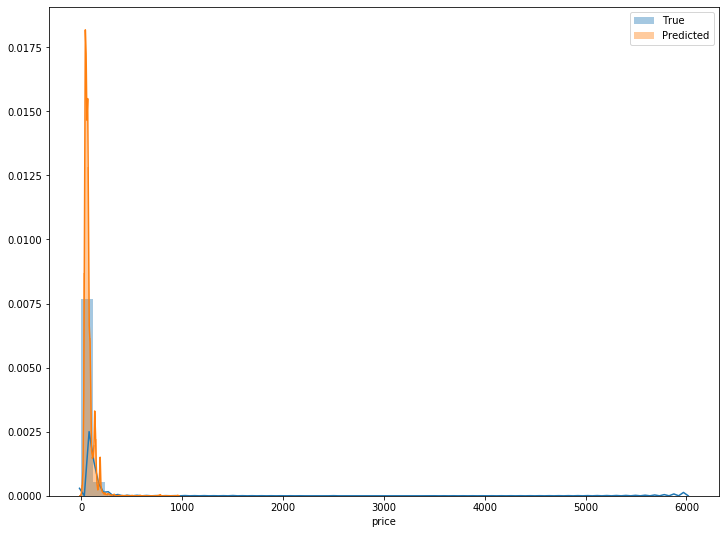

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.distplot(y_test, label='True')
sns.distplot(y_pred, label='Predicted')
plt.legend();

In [9]:
pipeline = make_pipeline(ce.OrdinalEncoder(), XGBRegressor(n_estimators=1000, n_jobs=-1,
                                                         random_state=1))
model = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = abs(y_pred)
print('RMSLE with XGB, Ordinal:', rmsle(y_test, y_pred))

[18:49:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE with XGB, Ordinal: 0.6301518252929649


In [10]:
model = pipeline.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:50:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
import pickle

pickle.dump(model, open('monday_model_2.pkl', 'wb'))

In [67]:
test = np.array(X_test)
# test.dtypes

In [68]:
# ['neighbourhood_group_cleansed', 'room_type', 'bedrooms',
#            'accommodates', 'bathrooms', 'zipcode', 'number_of_reviews']

pipeline.predict(test)

KeyError: 'neighbourhood_group_cleansed'

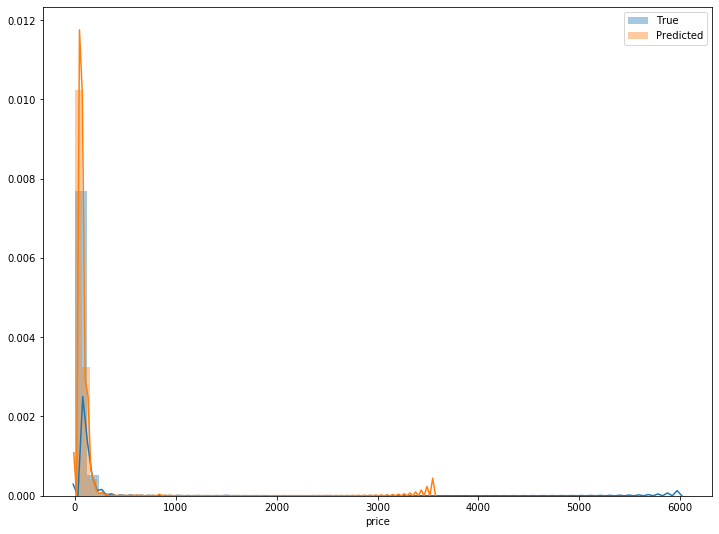

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.distplot(y_test, label='True')
sns.distplot(y_pred, label='Predicted')
plt.legend();

In [86]:
import sklearn

sklearn.__version__

'0.21.3'

In [66]:
# df2['amenities'].count('wifi')

In [71]:
# Logarithmic with actual features

target = 'price'
features = ['neighbourhood_group_cleansed', 'room_type', 'bedrooms',
           'accommodates', 'bathrooms', 'zipcode', 'number_of_reviews']

X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

pipeline = make_pipeline(ce.OneHotEncoder(), XGBRegressor(n_estimators=1000, n_jobs=-1,
                                                         random_state=1))
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)
print('RMSE with XGB, One Hot, Website Features:', rmse(y_test_log, y_pred_log))

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:43:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE with XGB, One Hot, Website Features: 0.4432554809973656


In [77]:
y_pred = np.expm1(y_pred_log)

print('un logged', rmsle(y_test, y_pred))

un logged 0.4432554809973656


In [78]:
from joblib import dump, load

dump(pipeline, 'pipeline1.joblib')

['pipeline1.joblib']

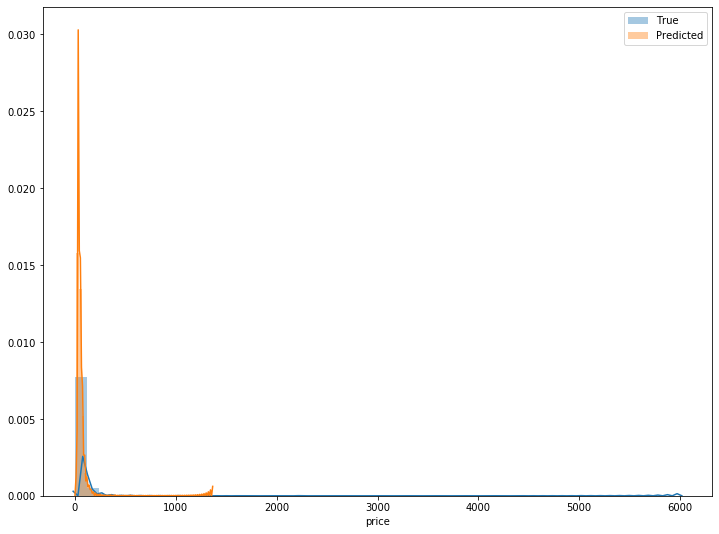

In [81]:
plt.figure(figsize=(12, 9))
sns.distplot(y_test, label='True')
sns.distplot(y_pred, label='Predicted')
plt.legend();

In [153]:
df = pd.read_csv('/Users/mattmastin/Downloads/listings_summary_clean.csv')

In [154]:
df.head()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month
0,2015,52.534537,13.402557,3,1.0,1.0,2.0,60.0,200.0,30.0,1,28.0,4,1125,118,93.0,10.0,10.0,9.0,3.76
1,2695,52.548513,13.404553,2,1.0,1.0,1.0,17.0,0.0,0.0,1,0.0,2,40,6,100.0,10.0,10.0,10.0,1.42
2,3176,52.534996,13.417579,4,1.0,1.0,2.0,90.0,200.0,50.0,2,20.0,62,1125,143,92.0,9.0,10.0,9.0,1.25
3,3309,52.498855,13.349065,2,1.0,1.0,1.0,26.0,250.0,30.0,1,18.0,5,360,25,88.0,9.0,9.0,9.0,0.39
4,7071,52.543157,13.415091,2,1.0,1.0,2.0,42.0,0.0,0.0,1,24.0,2,10,197,96.0,10.0,10.0,9.0,1.75


In [155]:
df.to_csv('dataset_tuesday.csv', index=False)

In [156]:
df.dtypes

id                          int64
latitude                  float64
longitude                 float64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
security_deposit          float64
cleaning_fee              float64
guests_included             int64
extra_people              float64
minimum_nights              int64
maximum_nights              int64
number_of_reviews           int64
review_scores_rating      float64
review_scores_accuracy    float64
review_scores_location    float64
review_scores_value       float64
reviews_per_month         float64
dtype: object